In [1]:
from jupyterthemes import jtplot

jtplot.style(theme='onedork')
jtplot.style(context='notebook', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(5, 4.5))

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import cmath
import numpy.polynomial.polynomial as poly
from matplotlib.colors import hsv_to_rgb

In [3]:
# plot x 

def plot(fr, to, f, name):
    if math.isnan(fr) or math.isnan(to):
        return print(name, 'has no real roots')
    
    x = np.linspace(fr,to,100)
    fig, ax = plt.subplots()
    ax.plot(x,f(x))
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(True, which='both')
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()
    
def roots_classic(a, b, c):
    try:
        x = math.sqrt((b**2) - (4 * a * c))
        return [(-b + x) / 2 * a, (-b - x) / 2 * a]
    except:
        return [float('nan'), float('nan')]

def roots_po(a, b, c):
#     sum -b, prd c
    try:
        d = math.sqrt(((-b/2) ** 2) - c)
        return [-b/2 + d, -b/2 - d]
    except:
        return [float('nan'), float('nan')]


### 1 Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)

In [4]:
def f(x):
    return x ** 2  

def f1(x):
    return (x-1) ** 2

def f2(x):
    return x ** 2 - 1

def f3(x):
    return x ** 2 + 1

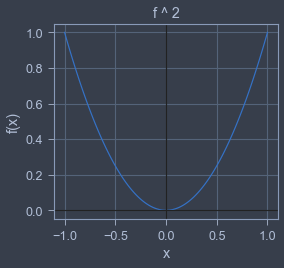

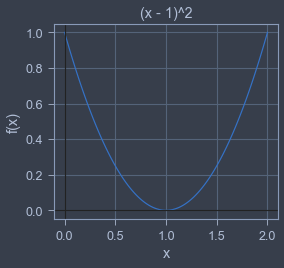

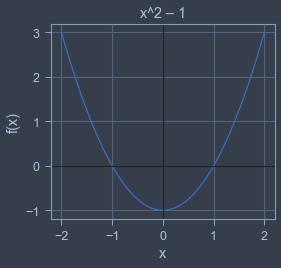

x^2 + 1 has no real roots


In [5]:
# x^2
roots = roots_po(1, 0, 0)
# (x-1)^2
roots1 = roots_po(1, -2, 1)
# x^2 – 1
roots2 = roots_po(1, 0, -1)
# x^2+ 1
roots3 = roots_po(1, 0, 1)

plot(-1 + roots[1], 1 + roots[0], f, 'f ^ 2')
plot(-1 + roots1[1], 1 + roots1[0], f1, '(x - 1)^2')
plot(-1 + roots2[1], 1 + roots2[0], f2, 'x^2 – 1')
plot(-1 + roots3[1], 1 + roots3[0], f3, 'x^2 + 1')

### 2 Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations


In [6]:
# x^2
rts_po0 = roots_po(1, 0, 0)
rts_cl0 = roots_classic(1, 0, 0)
# (x - 1)^2
rts_po1 = roots_po(1, -2, 1)
rts_cl1 = roots_classic(1, -2, 1)
# x^2 – 1
rts_po2 = roots_po(1, 0, -1)
rts_cl2 = roots_classic(1, 0, -1)
# x^2 + 1
rts_po3 = roots_po(1, 0, 1)
rts_cl3 = roots_classic(1, 0, 1)

print("roots for x^2:", "\n\tPo Shen Loh:", rts_po0, "\n\tClassic:", rts_cl0)
print("roots for (x - 1)^2:", "\n\tPo Shen Loh:", rts_po1, "\n\tClassic:", rts_cl1)
print("roots for x^2 – 1:", "\n\tPo Shen Loh:", rts_po2, "\n\tClassic:", rts_cl2)
print("roots for x^2 + 1:", "\n\tPo Shen Loh:", rts_po3, "\n\tClassic:", rts_cl3)

roots for x^2: 
	Po Shen Loh: [0.0, 0.0] 
	Classic: [0.0, 0.0]
roots for (x - 1)^2: 
	Po Shen Loh: [1.0, 1.0] 
	Classic: [1.0, 1.0]
roots for x^2 – 1: 
	Po Shen Loh: [1.0, -1.0] 
	Classic: [1.0, -1.0]
roots for x^2 + 1: 
	Po Shen Loh: [nan, nan] 
	Classic: [nan, nan]


### 3 to plot the newton fractals for the corresponding complex quadratic polynomials

In [7]:
def newton_set(f, df, roots, width, height, cx, cy, mnx, mxx, mny, mxy, niter, zoom):
    pixels = np.arange(width*height*3, dtype=np.float32).reshape(height, width, 3)

    h = 1e-7
    eps = 1e-3

    multcol = 5
    
    for y in range(height):
        zy = cy + map(y, 0, height, mny*zoom, mxy*zoom)
        
        for x in range(width):            
            zx = cy + map(x, 0, width, mnx*zoom, mxx*zoom)
            z = complex(zx, zy)
            count = 0
            
            for i in range(niter):                           
                dz = df(z)
                if dz == 0:
                    break
        
                znext = z - (f(z) / dz) # Newton iteration
                
                pixels[height-y-1,x] = (0, 0, 0)
                
                if abs(znext - z) < eps: # stop when close enough to any root
                    break
                
                z = znext
                count += 1
                
            for j, root in enumerate(roots):
                    if abs(z - root) < eps:
                        pixels[height-y-1,x] = hsv_to_rgb((
                            map(j, 0, len(roots), 0, 1), map(count, 0, niter, 0.8, 1), 1
                        ))
                    
    return pixels

def ds(f, df, roots, name,
       width = 500, height = 500,
       cx = 0, cy = 0, mnx = -2.5, 
       mxx = 2.5, mny = -2.5, mxy = 2.5, 
       niter = 250, zoom = 1):
    
    print("Z region from (",
          cx + map(0, 0, width, mnx*zoom, mxx*zoom),
          ",",
          cy + map(0, 0, height, mny*zoom, mxy*zoom) ,
          ") to (",
          cx + map(width, 0, width, mnx*zoom, mxx*zoom),
          ",",
          cy + map(height, 0, height, mny*zoom, mxy*zoom),
          ")"
         )
    
    pimg = newton_set(f, df, roots, width, height, cx, cy, mnx, mxx, mny, mxy, niter, zoom)
    
    plt.title('Newton Fractal ' + name)
    
    plt.xlabel("real"
               + "("
               + str(cx + map(0, 0, width, mnx*zoom, mxx*zoom))
               + ","
               + str(cx + map(width, 0, width, mnx*zoom, mxx*zoom))
               + ")"
              )
    
    plt.ylabel("imaginary"
               + "("
               + str(cy + map(0, 0, height, mny*zoom, mxy*zoom))
               + ","
               + str(cy + map(height, 0, height, mny*zoom, mxy*zoom)) 
               + ")")
    
    plt.imshow(pimg)
    plt.show()

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


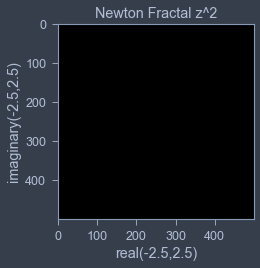

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


In [ ]:
def map(value, istart, istop, ostart, ostop):
    return ostart + (ostop - ostart) * ((value - istart) / (istop - istart))

def df(x):
    return 2 * x  

def df1(x):
    return 2 * (x - 1)

def df2(x):
    return 2 * x

def df3(x):
    return 2 * x 

ds(f, df, roots, "z^2", zoom = 1)
ds(f1, df1, roots1, "(z-1)^2", zoom = 1)
ds(f2, df2, roots2, "z^2 – 1", zoom = 1)
ds(f3, df3, roots3, "z^2 + 1", zoom = 1)

El unico fractal "visible" es el de z^2-1 ya que es el unico con mas de 1 raiz, por cada raiz hay un color, ya que los otros solo tienen 1 se muestra en negro. Finalmente el de z^2 + 1 no tiene raiz

### 4 Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.

In [ ]:
def iterates(z, f, df):
    r=[]
    i=[]
    for k in range(50):
      dz = df(z)
      z = z - f(z) / dz # Newton iteration
      r.append(np.real(z))
      i.append(np.imag(z))
        
    return r, i

def iterates_plot(z, f, df, name, namef):
    r, i = iterates(z, f, df)
    fig = plt.figure(figsize = (15,3))
    fig.suptitle(namef + ': Newton iterates form ' + name)
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(r)
    ax1.set_ylabel('Real part')
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(i)
    ax2.set_ylabel('Imagnary part')
    
    plt.show()
    
def iterates_f(f, df, name):
    print(name, ": ")
    iterates_plot(10.0 + 0.0j, f, df, "10.0 + 0.0j", name)
    iterates_plot(0.0 + 10.0j, f, df, "0.0 + 10.0j", name)

In [ ]:
iterates_f(f, df, "z^2")
iterates_f(f1, df1, "(z-1)^2")
iterates_f(f1, df1, "z^2 – 1")
iterates_f(f1, df1, "z^2+ 1")

### 5 Plot he Newton iterates for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.

In [ ]:
def iterates_diagonal(f, df, name):
    print(name, ": ")
    iterates_plot(0.0 + 0.0j, f, df, "0.0 + 0.0j", name)

In [ ]:
iterates_diagonal(f, df, "z^2")

In [ ]:
iterates_diagonal(f1, df1, "(z-1)^2")

In [ ]:
iterates_diagonal(f2, df2, "z^2 – 1")

In [ ]:
iterates_diagonal(f3, df3, "z^2+ 1")